In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")


## Choix du nombre de replication

0     37.106282
1     37.106811
2     37.103057
3     37.146364
4     37.132613
5     37.236862
6     37.141704
7     37.135120
8     37.209000
9     37.042619
10    37.186000
11    37.034706
12    37.238333
13    37.103714
14    37.115000
Name: mean(simulations collect each.pcnt), dtype: float64


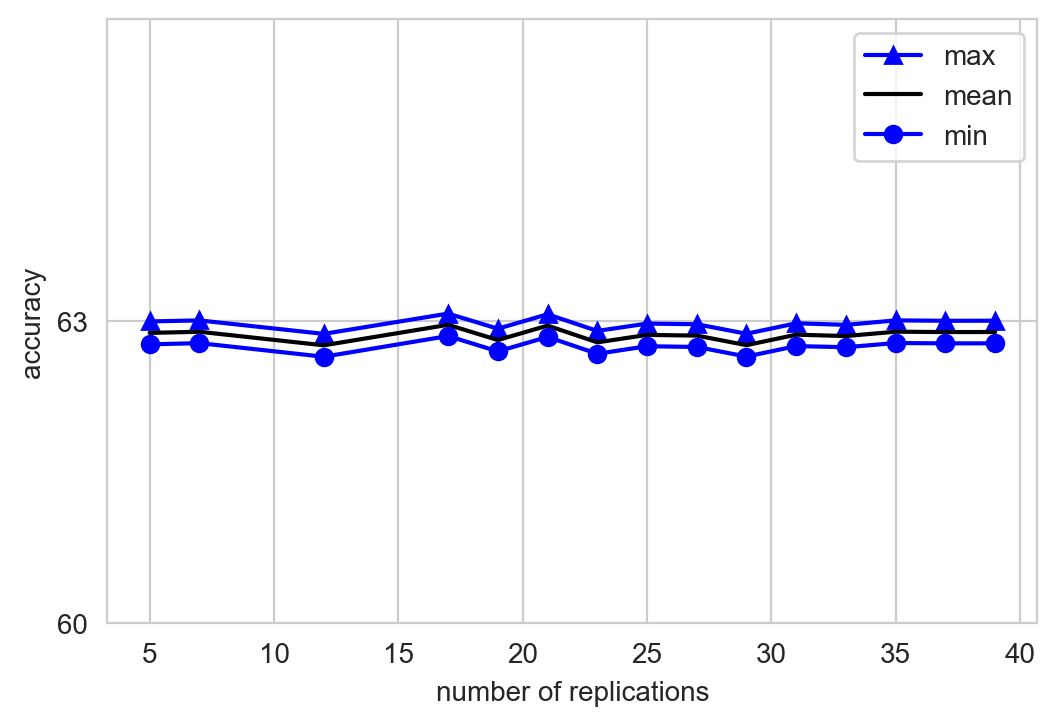

In [214]:
data=pd.read_csv('nb_replication.csv')

x=list()
y=list()
y_err=list()



x=data['simulation.nb_repliq']
y=data['mean(simulations collect each.pcnt)']
y_err=data['mean(simulations collect each.std_pcnt)']

print(y)
plt.figure(dpi=200)
v_unit=[100 for i in range(len(y))]
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

plt.ylim(60,66)
plt.yticks([k for k in range(60,66,3)]);
plt.xlabel('number of replications')
plt.ylabel('accuracy')
plt.legend();

plt.show()


### Validation des résultats du modèle pour une taille de cellule grille de 18 km

9.604613563624326 90.39538643637567 90.39538643637567


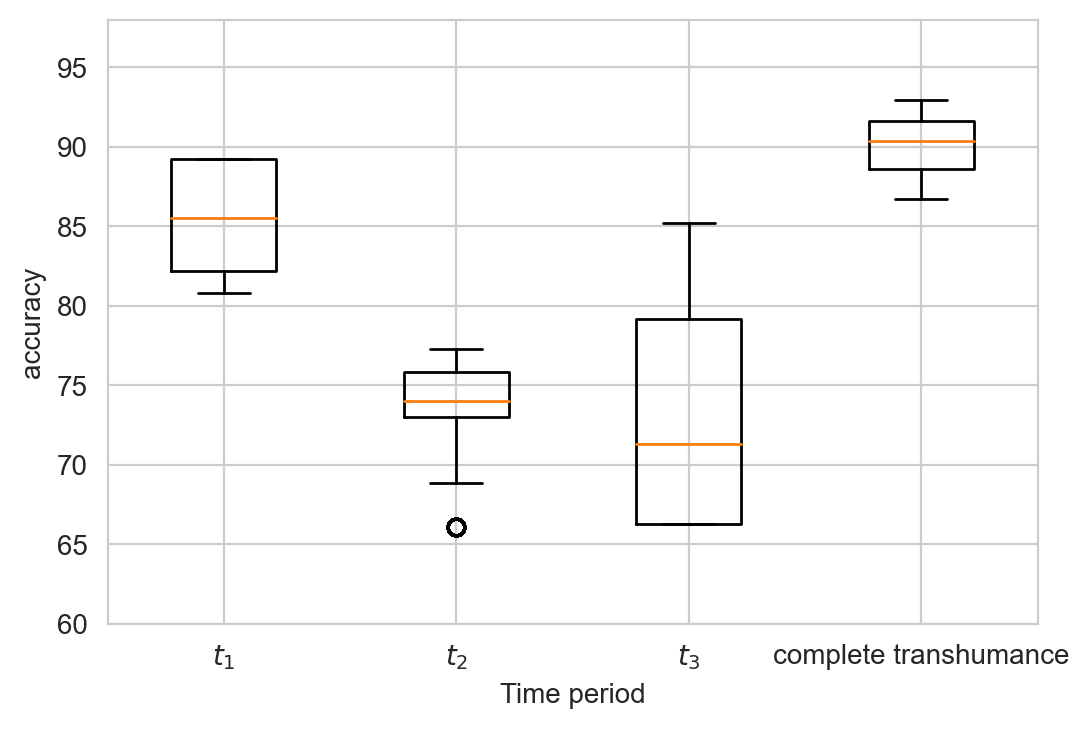

In [50]:
data_t=pd.read_csv('validation_espace_vitesse_t_sa18_news.csv')
data_t1=pd.read_csv('validation_espace_vitesse_t1_sa18_news.csv')
data_t2=pd.read_csv('validation_espace_vitesse_t2_sa18_news.csv')
data_t3=pd.read_csv('validation_espace_vitesse_t3_sa18_news.csv')

plt.figure(dpi=200);

y=list()
#data_t.head()

d_t=data_t['pcnt']

#print(len(d_t)==len(v_t))
d_t1=data_t1['pcnt']
v_t1=[100 for i in range(len(d_t1))]
y.append(np.subtract(v_t1,d_t1).mean())
d_t2=data_t2['pcnt']
v_t2=[100 for i in range(len(d_t2))]
y.append(np.subtract(v_t2,d_t2).mean())
d_t3=data_t3['pcnt']
v_t3=[100 for i in range(len(d_t3))]
y.append(np.subtract(v_t3,d_t3).mean())
v_t=[100 for i in range(len(d_t))]
y.append(np.subtract(v_t,d_t).mean())

print(d_t.mean(),np.subtract(v_t,d_t).mean(),y[3])
# tracée de la boxplot
d_box=[v_t1-d_t1,v_t2-d_t2,v_t3-d_t3,v_t-d_t]
plt.boxplot(d_box,labels=['$t_1$','$t_2$','$t_3$', 'complete transhumance'], autorange=True,usermedians=y,bootstrap=None);#

plt.ylim(60,98);
plt.xlabel('Time period')
plt.ylabel('accuracy')
#plt.legend()
plt.show();

## Impact de tous les paramètres pour une transhumance complète

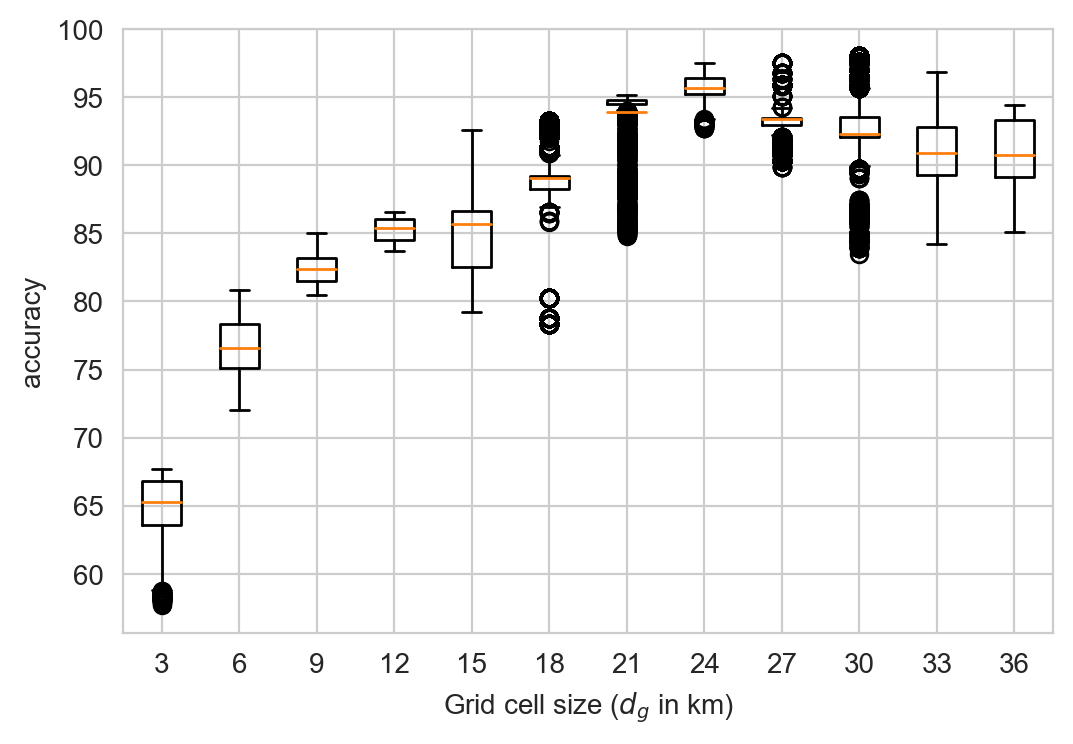

In [19]:
data=pd.read_csv('impact_tout_parametre_t_sa20_news.csv')

plt.figure(dpi=200)

## segmentation puis unification des données 

d3=data[data['largeur_cellule']==3000]
v3=[100 for i in range(len(d3['pcnt']))]
d6=data[data['largeur_cellule']==6000]
v6=[100 for i in range(len(d6['pcnt']))]
d9=data[data['largeur_cellule']==9000]
v9=[100 for i in range(len(d9['pcnt']))]

d12=data[data['largeur_cellule']==12000]
v12=[100 for i in range(len(d12['pcnt']))]
d15=data[data['largeur_cellule']==15000]
v15=[100 for i in range(len(d15['pcnt']))]
d18=data[data['largeur_cellule']==18000]
v18=[100 for i in range(len(d18['pcnt']))]

d21=data[data['largeur_cellule']==21000]
v21=[100 for i in range(len(d21['pcnt']))]
d24=data[data['largeur_cellule']==24000]
v24=[100 for i in range(len(d24['pcnt']))]
d27=data[data['largeur_cellule']==27000]
v27=[100 for i in range(len(d27['pcnt']))]

d30=data[data['largeur_cellule']==30000]
v30=[100 for i in range(len(d30['pcnt']))]
d33=data[data['largeur_cellule']==33000]
v33=[100 for i in range(len(d33['pcnt']))]
d36=data[data['largeur_cellule']==36000]
v36=[100 for i in range(len(d36['pcnt']))]
#d36.head()

x=list()
y=list()
y_err=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    #y_err.append(subset['pcnt'].std())
    v_unit.append(100)

y=np.subtract(v_unit,y)
d_box=[v3-d3['pcnt'],v6-d6['pcnt'],v9-d9['pcnt'],v12-d12['pcnt'],v15-d15['pcnt'],v18-d18['pcnt'],v21-d21['pcnt'],v24-d24['pcnt'],v27-d27['pcnt'],v30-d30['pcnt'],v33-d33['pcnt'],v36-d36['pcnt'],]
#print(d_box[2])

# Tracée de la box plot
plt.boxplot(d_box,labels=[k for k in range(3,37,3)], autorange=True,usermedians=y,bootstrap=None);#
#plt.xticks([k for k in range(0,40,3)]);
x=list()
y=list()
y_err=list()
v_unit=list()

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
#plt.legend()
plt.show();


## Impacte du changement de dimension de l'espace

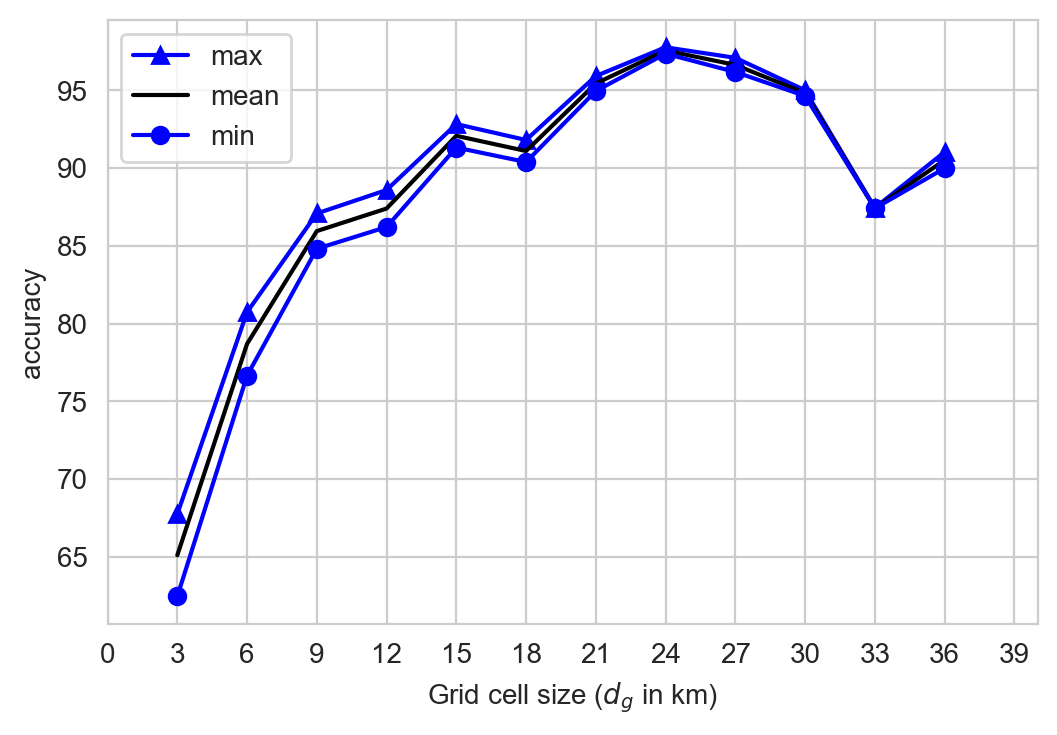

In [18]:
data=pd.read_csv('impact_espace.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_1$

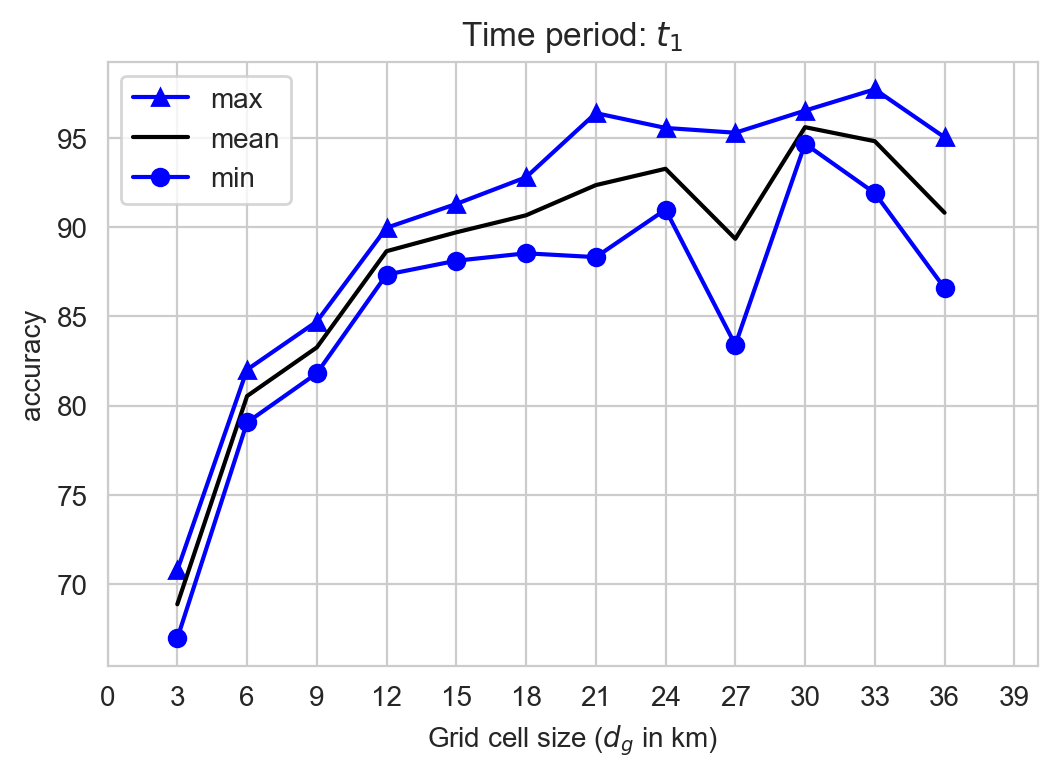

In [2]:
data=pd.read_csv('impact_espace_t1.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_1$')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_2$

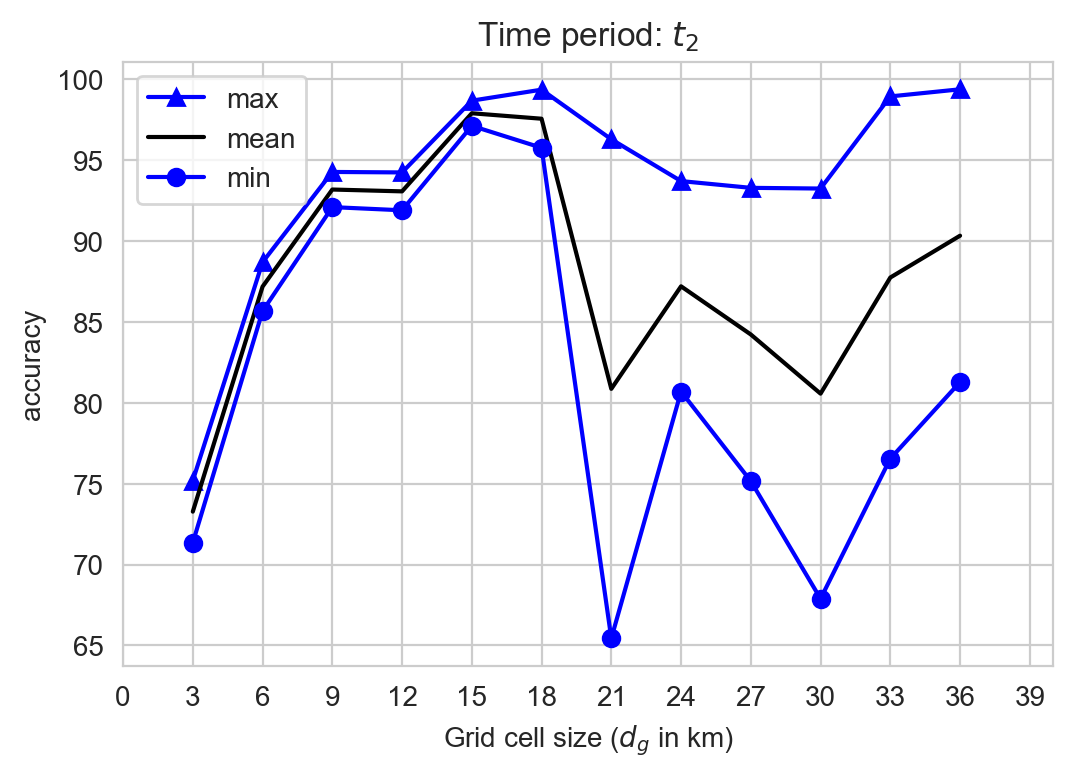

In [3]:
data=pd.read_csv('impact_espace_t2.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_2$')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_3$

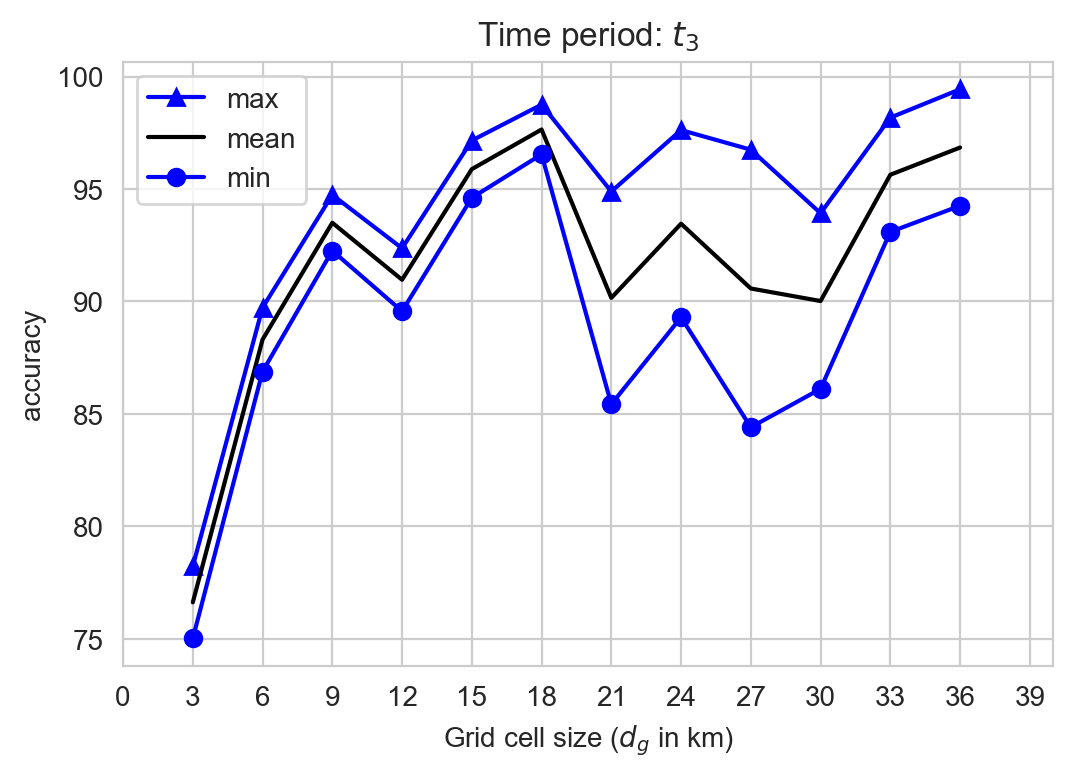

In [4]:
data=pd.read_csv('impact_espace_t3.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_3$')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_4$ vitesse: a=15.5, r=17.5

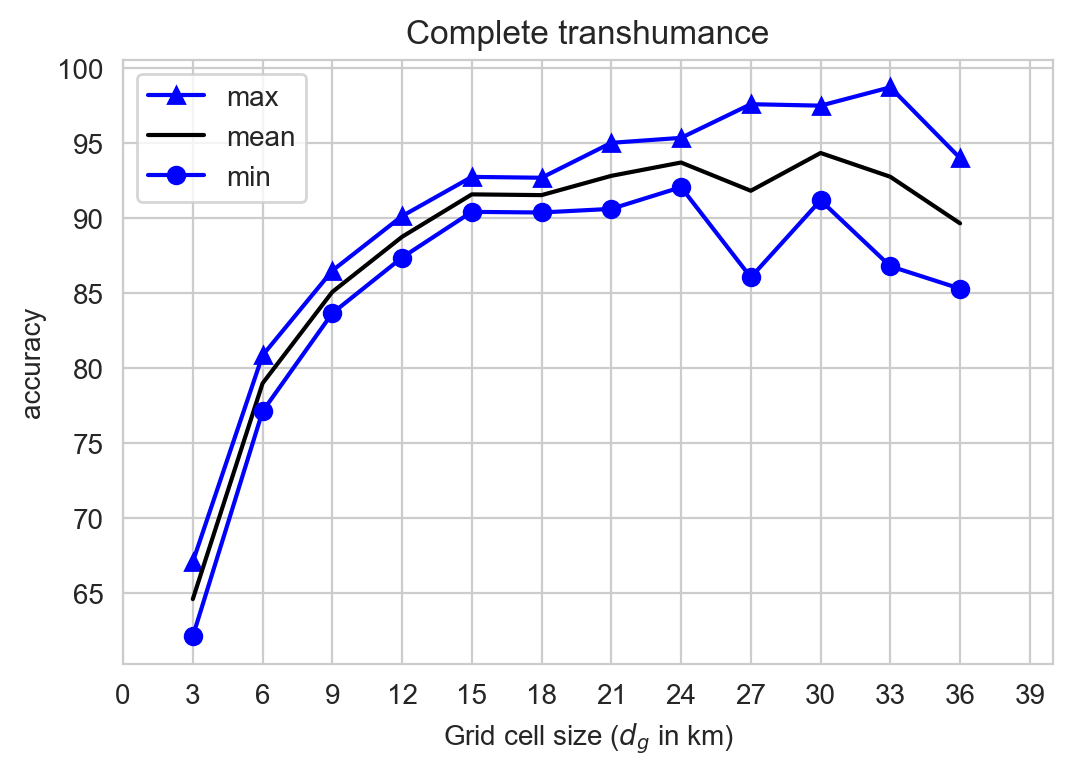

In [5]:
data=pd.read_csv('impact_espace_t.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Complete transhumance')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_1$ vitesse: a=17.5, r=19.5

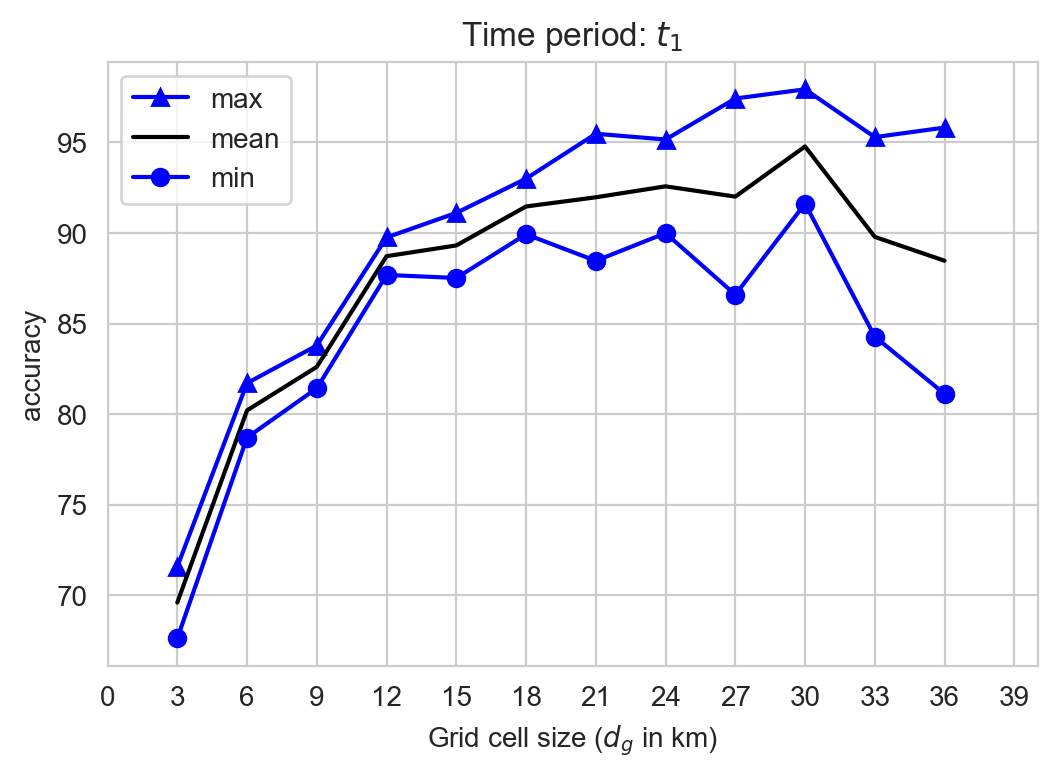

In [6]:
data=pd.read_csv('impact_espace_t1_sa17.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_1$')
plt.legend()
plt.show();

## Impact du changement de dimension de l'espace: pour le decoupage $t_2$ vitesse: a=17.5, r=19.5

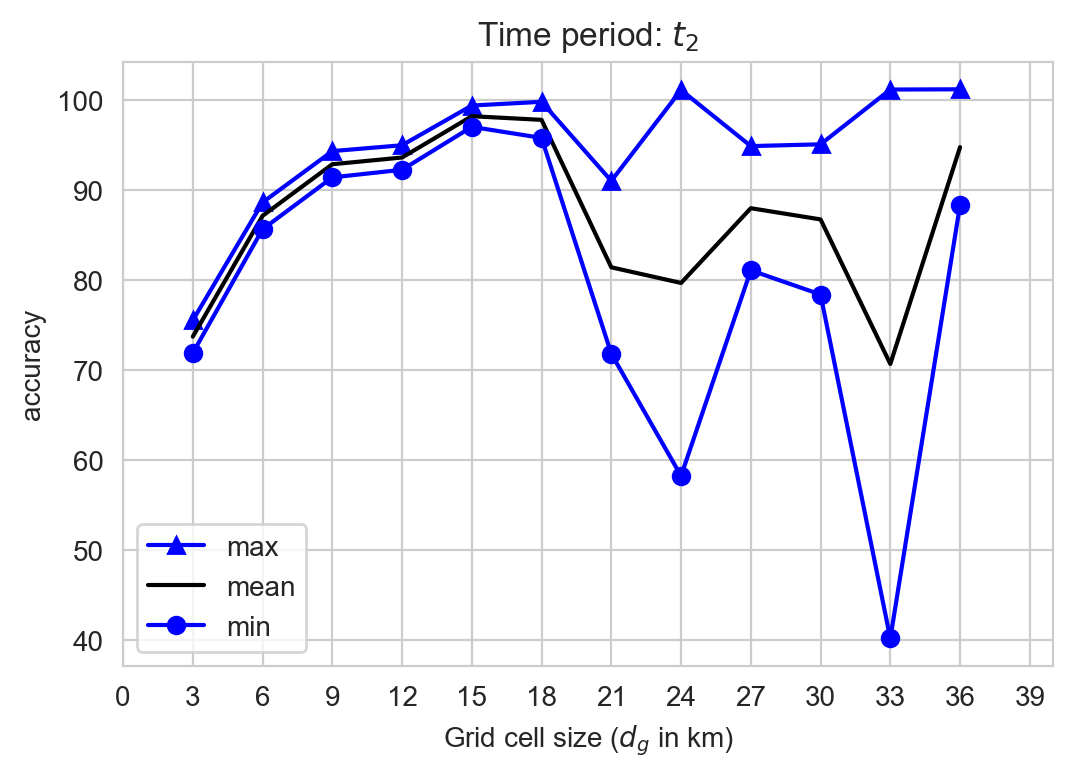

In [8]:
data=pd.read_csv('impact_espace_t2_sa17.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_2$')
plt.legend()
plt.show();

## Impact du changement de dimension de l'espace: pour le decoupage $t_3$ vitesse: a=17.5, r=19.5

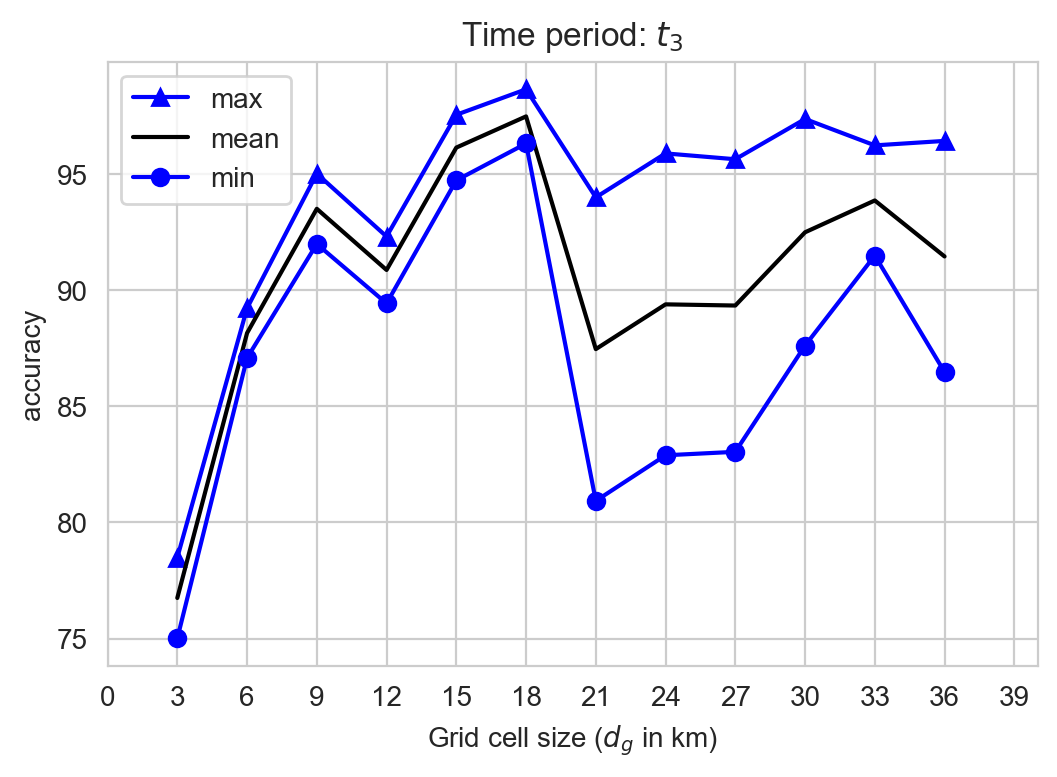

In [9]:
data=pd.read_csv('impact_espace_t3_sa17.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_3$')
plt.legend()
plt.show();

## Impact du changement de dimension de l'espace: pour le decoupage $t_4$ vitesse: a=17.5, r=19.5

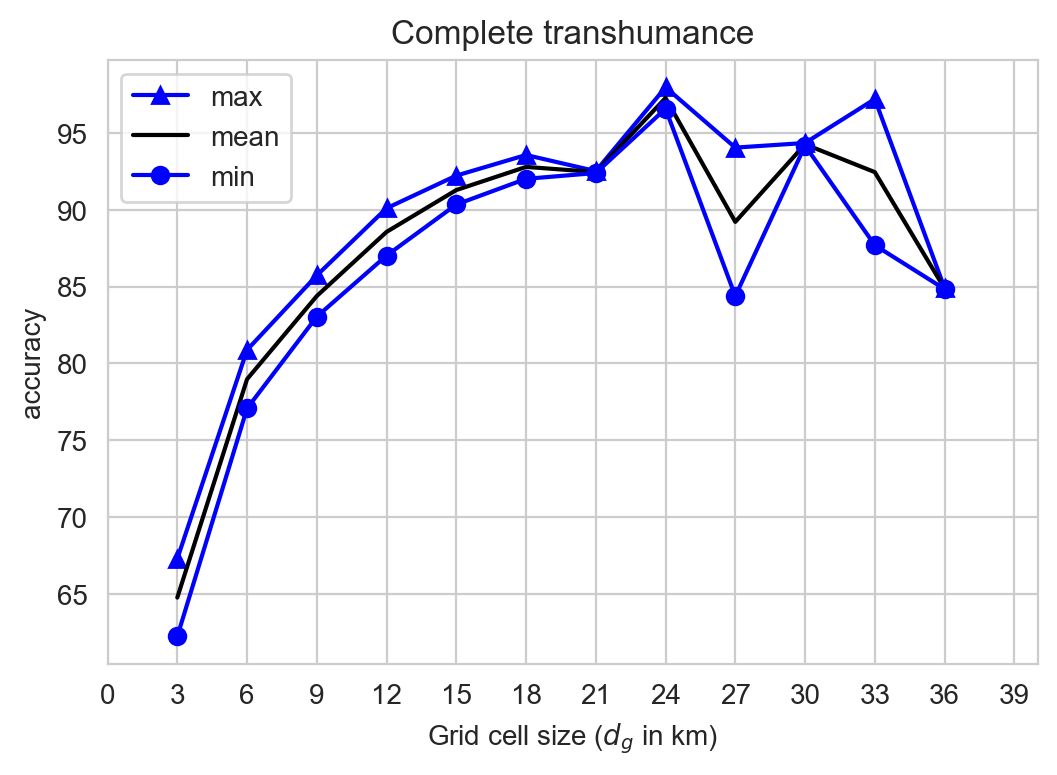

In [10]:
data=pd.read_csv('impact_espace_t_sa17.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Complete transhumance')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_1$ vitesse: a=20.5, r=22.5

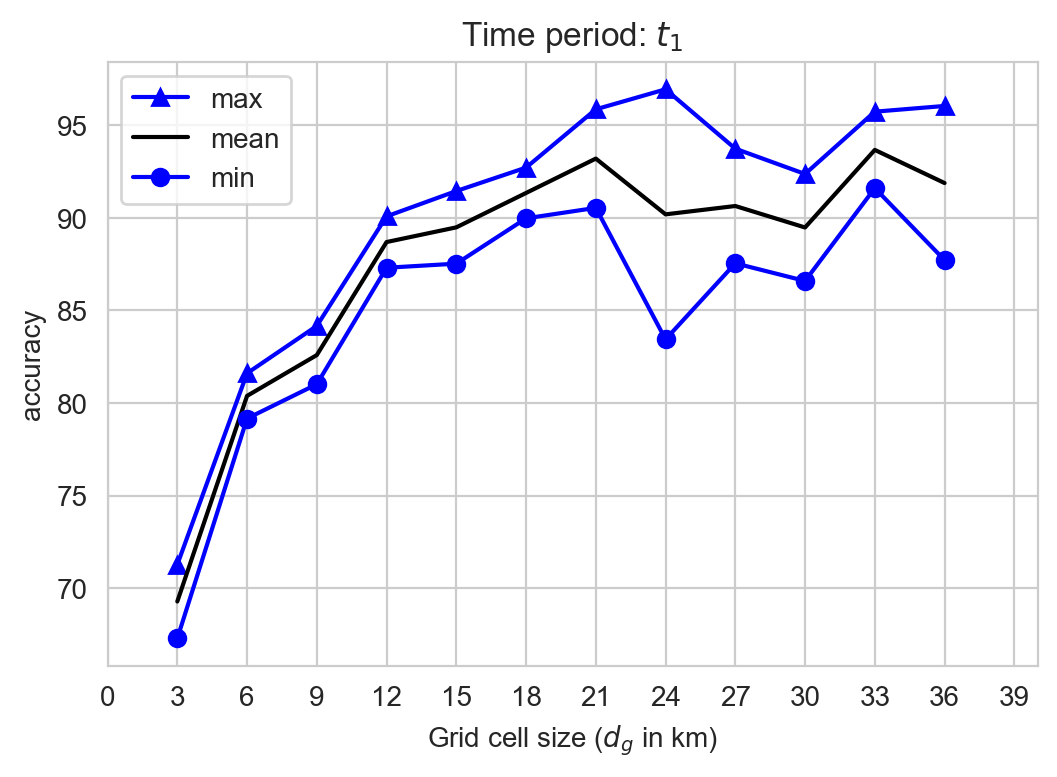

In [11]:
data=pd.read_csv('impact_espace_t1_sa20.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_1$')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_2$ vitesse: a=20.5, r=22.5

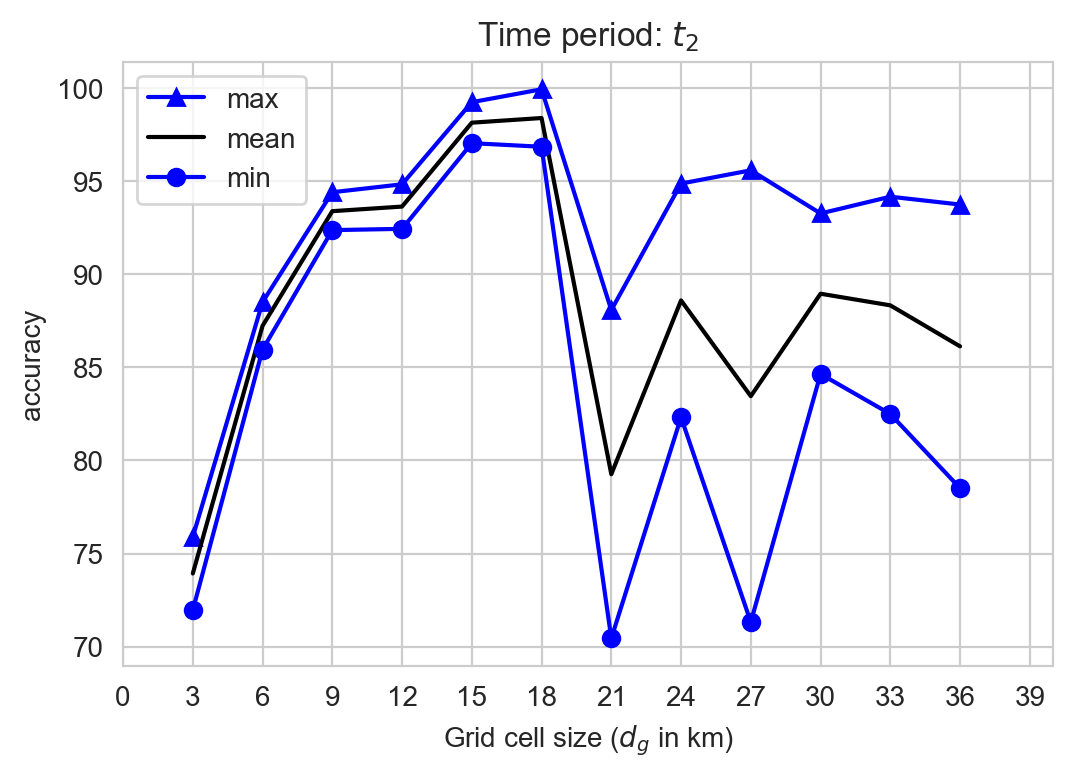

In [12]:
data=pd.read_csv('impact_espace_t2_sa20.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_2$')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_3$ vitesse: a=20.5, r=22.5

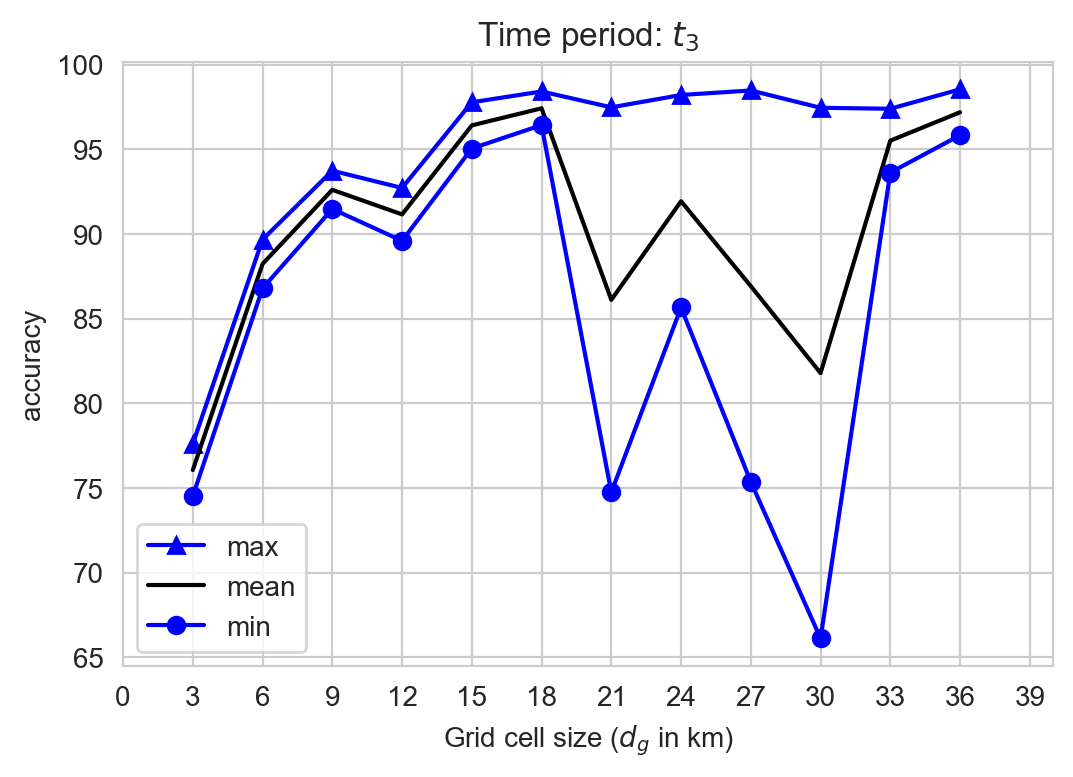

In [13]:
data=pd.read_csv('impact_espace_t3_sa20.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Time period: $t_3$')
plt.legend()
plt.show();

## Impacte du changement de dimension de l'espace: pour le decoupage $t_4$ vitesse: a=20.5, r=22.5

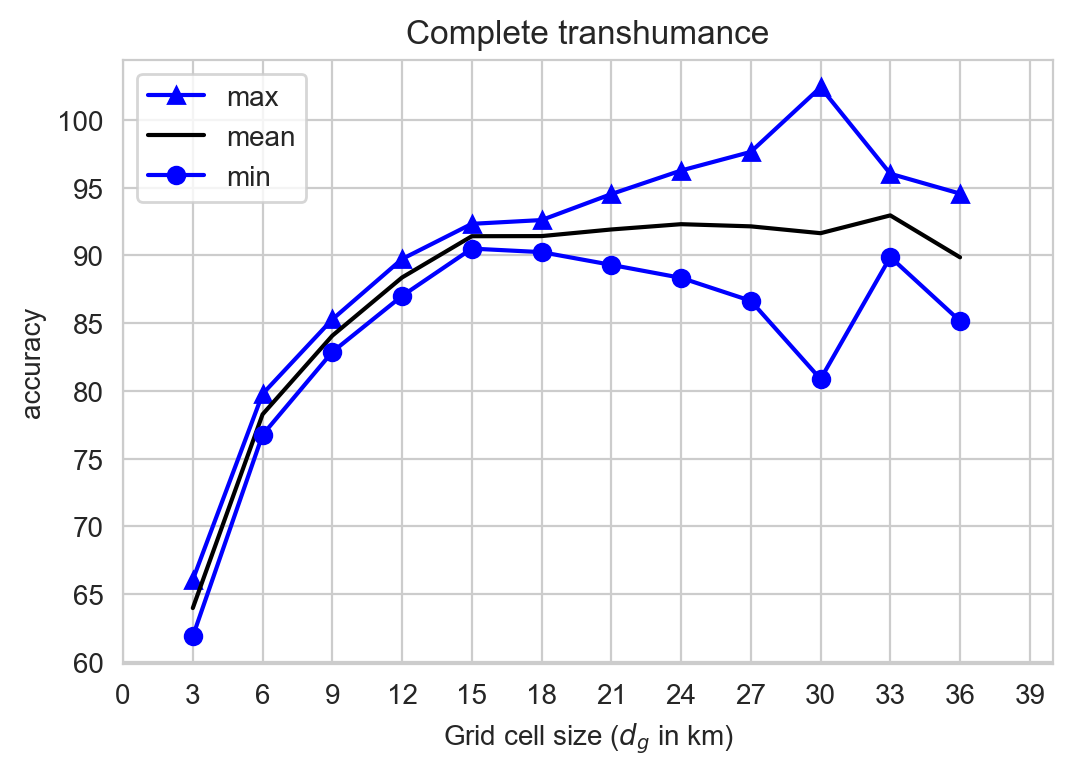

In [14]:
data=pd.read_csv('impact_espace_t_sa20.csv')

plt.figure(dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['largeur_cellule'].unique():
    subset=data[data.largeur_cellule==cat]
    x.append(cat/1000)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.xlim(0,40)
plt.xticks([k for k in range(0,40,3)])

plt.xlabel('Grid cell size ($d_g$ in km)')
plt.ylabel('accuracy')
plt.title('Complete transhumance')
plt.legend()
plt.show();

## Tracer 3D de la dimension spatio-temporelle des déplacements des troupeaux

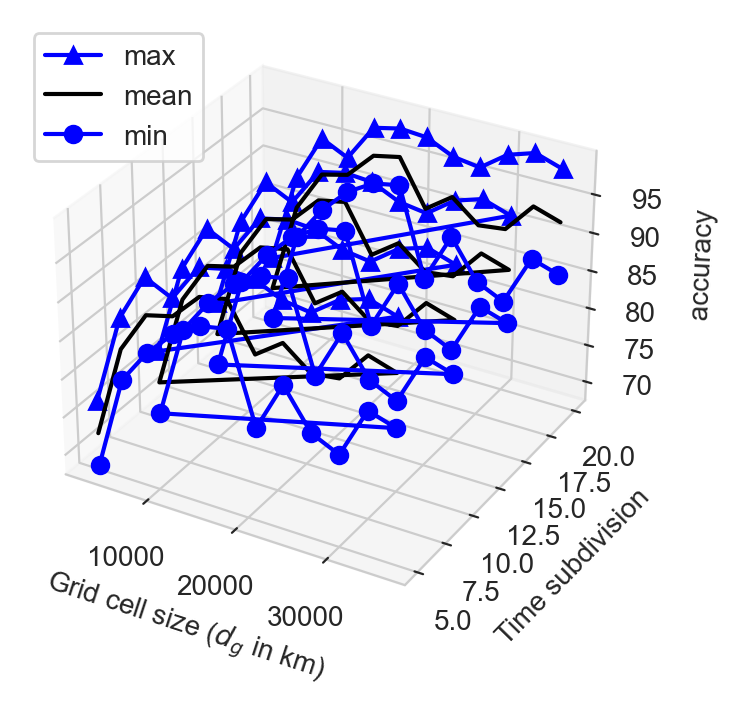

In [15]:
from matplotlib import cm
fig = plt.figure(figsize=(4,4),dpi=200)
ax = fig.add_subplot(projection='3d')

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

data1=pd.read_csv('impact_espace_t1.csv')
data2=pd.read_csv('impact_espace_t2.csv')
data3=pd.read_csv('impact_espace_t3.csv')
data4=pd.read_csv('impact_espace_t.csv')

data=pd.concat([data1,data2,data3,data4])

x=list()
y=list()
z=list()
z_err=list()
v_unit=list()

for cat in data['temp'].unique():
    subset=data[data.temp==cat]
    for cat2 in data['largeur_cellule'].unique():
        subset=data[data.largeur_cellule==cat2]
        y.append(cat)
        x.append(cat2)
        z.append(subset['pcnt'].mean())
        z_err.append(subset['pcnt'].std())
        v_unit.append(100)

z=np.subtract(v_unit,z)

## Tracer 3D avec meshgrid
#X,Y=np.meshgrid(x,y)
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
 #                      linewidth=0, antialiased=False)


## Tracer avec plot3D
temp=np.add(z_err,z)
ax.plot3D(x,y,temp,'b^-',label='max')
ax.plot3D(x,y,z,'-k',label='mean')
#ax.plot_trisurf(x,y,z,cmap='Greens_r',edgecolor='none')
temp=np.subtract(z,z_err)
ax.plot3D(x,y,temp,'bo-',label='min')

ax.set_xlabel('Grid cell size ($d_g$ in km)')
ax.set_ylabel('Time subdivision')
ax.set_zlabel('accuracy')

plt.legend();

plt.show()



## Impact de la vitesse de déplacement des troupeaux

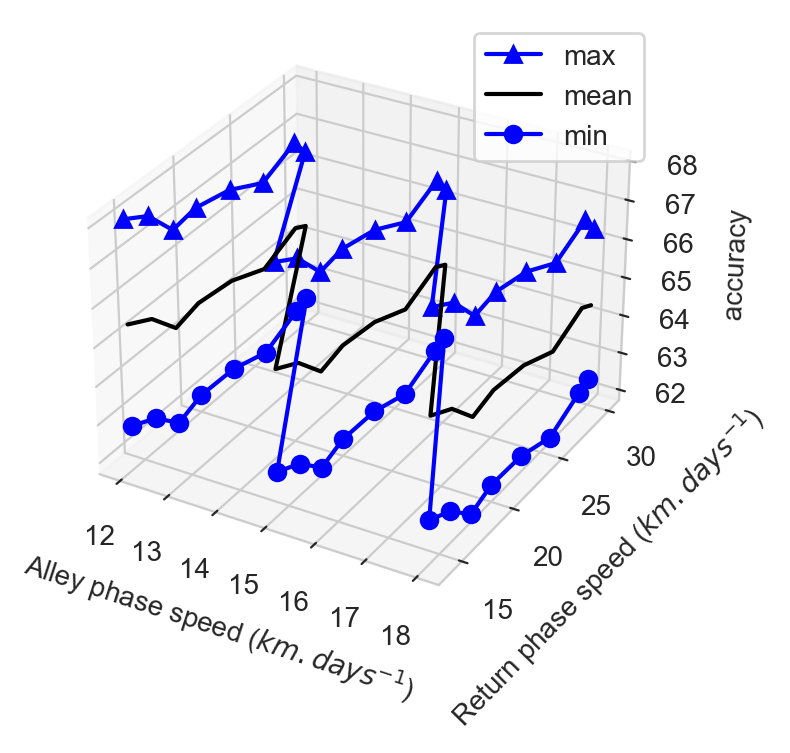

In [29]:
data=pd.read_csv('vitesse.csv')
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(4,4),dpi=200)
ax = fig.add_subplot(projection='3d')
#ax = plt.axes(projection='3d')

data.head()

#plt.figure(dpi=200)
x=list()
y=list()
z_err=list()
z=list()
v_unit=list()
temp=list()

for cat in data['vitesse_aller'].unique():
    subset=data[data.vitesse_aller==cat]
    for cat2 in data['vitesse_retour'].unique():
        subset=data[data.vitesse_retour==cat2]
        y.append(cat2)
        x.append(cat)
        z.append(subset['pcnt'].mean())
        z_err.append(subset['pcnt'].std())
        v_unit.append(100)
    
   
z=np.subtract(v_unit,z)


temp=np.add(z_err,z)
ax.plot3D(x,y,temp,'b^-',label='max')
ax.plot3D(x,y,z,'-k',label='mean')
#ax.plot_trisurf(x,y,z,cmap='Greens_r',edgecolor='none')
temp=np.subtract(z,z_err)
ax.plot3D(x,y,temp,'bo-',label='min')

#ax.add_collection3d(plt.fill_between(x,y, z - z_err, z + z_err,color='orange', alpha=0.32),1, zdir='z')

#plt.xlim(0,40)
#plt.xticks([k for k in range(0,40,3)])
#ax.scatter(data['vitesse_aller'], data['vitesse_retour'], np.subtract(np.linspace(100,100,len(data['vitesse_retour'])),data['pcnt']))
ax.set_xlabel('Alley phase speed ($km.days^{-1}$)')
ax.set_ylabel('Return phase speed ($km.days^{-1}$)')
ax.set_zlabel('accuracy')
plt.legend();

plt.show()


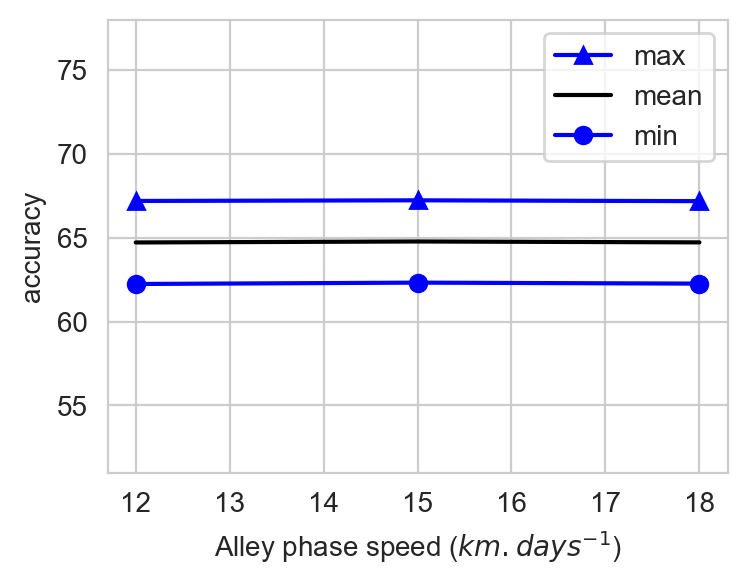

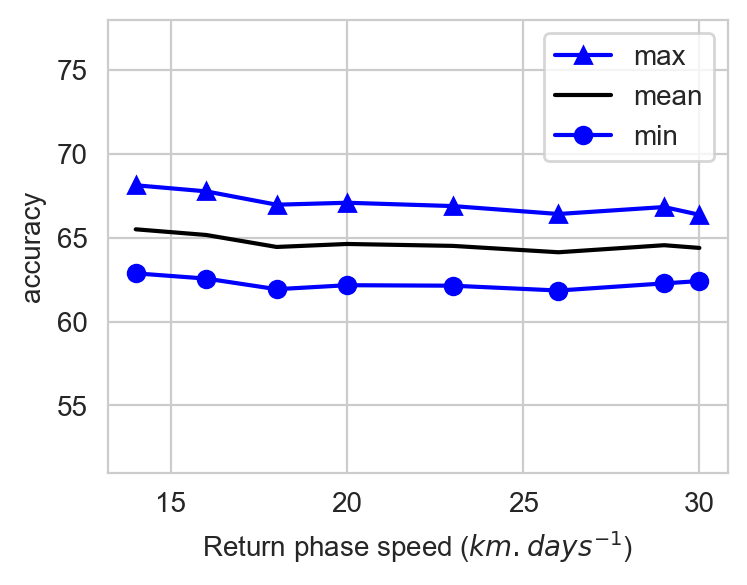

In [30]:
data=pd.read_csv('vitesse.csv')
x=list()
z_err=list()
z=list()
v_unit=list()

for cat in data['vitesse_aller'].unique():
    subset=data[data.vitesse_aller==cat]
    x.append(cat)
    z.append(subset['pcnt'].mean())
    z_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
z=np.subtract(v_unit,z)
plt.figure(figsize=(4,3),dpi=200)
plt.plot(x,np.add(z_err,z),'b^-', label='max')
plt.plot(x,z,'k', label='mean')
#plt.fill_between(x, z - z_err, z + z_err,color='blue', alpha=0.32)
plt.plot(x,np.subtract(z,z_err),'bo-',label='min')
plt.xlabel('Alley phase speed ($km.days^{-1}$)')
plt.ylabel('accuracy')
plt.ylim(51,78)
#plt.xticks([k for k in range(12,19)])
#plt.yticks([k for k in range(60,72,2)])
plt.legend()
#---------------- Impact de la vitesse retour --------------------
plt.figure(figsize=(4,3),dpi=200)
x=list()
v_unit=list()
z=list()
z_err=list()
for cat in data['vitesse_retour'].unique():
    subset=data[data.vitesse_retour==cat]
    x.append(cat)
    z.append(subset['pcnt'].mean())
    z_err.append(subset['pcnt'].std())
    v_unit.append(100)
    
   
z=np.subtract(v_unit,z)
plt.plot(x,np.add(z_err,z),'b^-', label='max')
#plt.fill_between(x, z - z_err, z + z_err,color='blue', alpha=0.32)
plt.plot(x,z,'k', label='mean');
plt.plot(x,np.subtract(z,z_err),'bo-',label='min')
plt.xlabel('Return phase speed ($km.days^{-1}$)')
plt.ylabel('accuracy')
plt.ylim(51,78)
#plt.ylim(61,70)
plt.legend();

## Impact d'une réduction homogène de la végétation

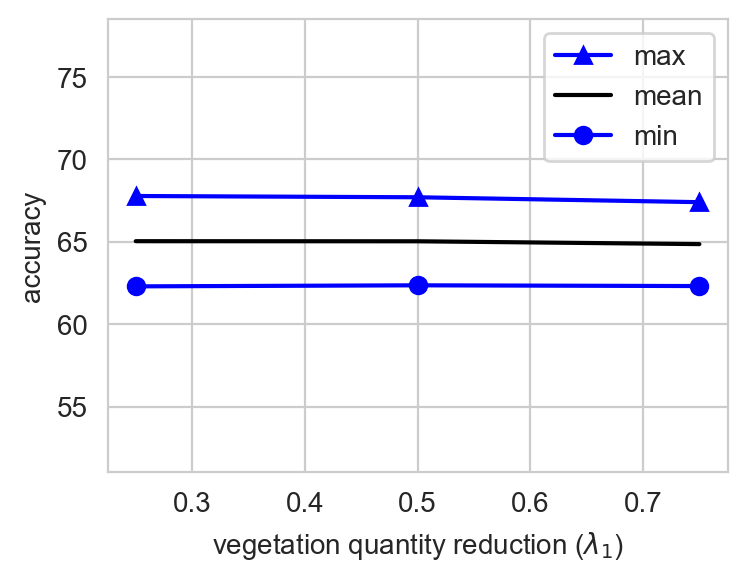

In [9]:
data=pd.read_csv('vegetation.csv')

plt.figure(figsize=(4,3),dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['lambda1'].unique():
    subset=data[data.lambda1==cat]
    x.append(cat)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.ylim(51,78.5)
#plt.xticks([k for k in range(20,80,10)])

plt.xlabel('vegetation quantity reduction ($\lambda_1$)')
plt.ylabel('accuracy')
plt.legend();
plt.show()

## Impact d'une réduction du nombre de point d'eau

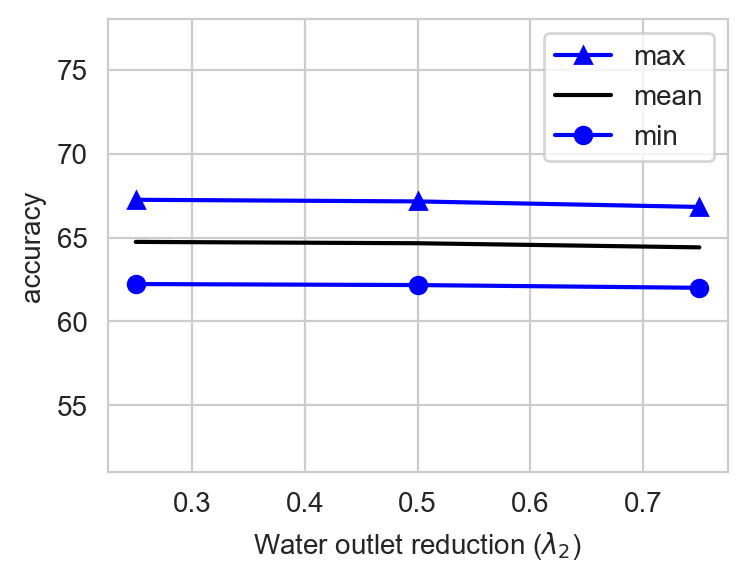

In [10]:
data=pd.read_csv('water.csv')

plt.figure(figsize=(4,3),dpi=200)
x=list()
y=list()
y_err=list()
y_err2=list()
v_unit=list()

for cat in data['lambda2'].unique():
    subset=data[data.lambda2==cat]
    x.append(cat)
    y.append(subset['pcnt'].mean())
    y_err.append(subset['pcnt'].std())
    v_unit.append(100)
   
y=np.subtract(v_unit,y)
plt.plot(x,np.add(y_err,y),'b^-', label='max')

plt.plot(x,y,'k-',label='mean')
plt.plot(x,np.subtract(y,y_err),'bo-',label='min')

#plt.fill_between(x, y - y_err, y + y_err,color='blue', alpha=0.32)

plt.ylim(51,78)
#plt.xlim(20,80)
#plt.xticks([k for k in range(20,80,10)])

plt.xlabel('Water outlet reduction ($\lambda_2$)')
plt.ylabel('accuracy')
plt.legend();
plt.show()

## Impact végétation et point d'eau

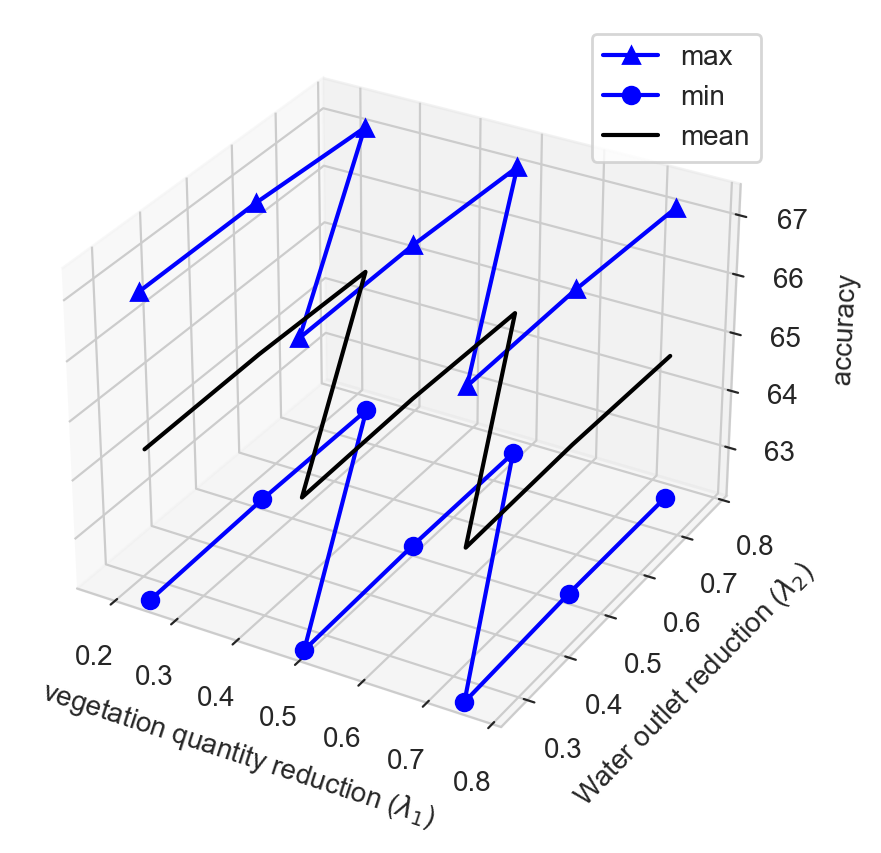

In [17]:
data=pd.read_csv('vegetation_water.csv')
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(5,5),dpi=200)
ax = fig.add_subplot(projection='3d')
#ax = plt.axes(projection='3d')




#plt.figure(dpi=200)
x=list()
y=list()
z_err=list()
z=list()
v_unit=list()
temp=list()

for cat in data['lambda1'].unique():
    subset=data[data.lambda1==cat]
    for cat2 in data['lambda2'].unique():
        subset=data[data.lambda2==cat2]
        y.append(cat2)
        x.append(cat)
        z.append(subset['pcnt'].mean())
        z_err.append(subset['pcnt'].std())
        v_unit.append(100)
    
   
z=np.subtract(v_unit,z)


temp=np.add(z_err,z)
ax.plot(x,y,temp,'b^-',label='max')

temp=np.subtract(z,z_err)
ax.plot(x,y,temp,'bo-',label='min')



plt.xlim(0.15,0.8)
plt.ylim(0.25,0.8)
#plt.xticks([k for k in range(0,40,3)])
#ax.scatter(data['lambda1'], data['lambda2'], np.subtract(np.linspace(100,100,len(data['lambda1'])),data['pcnt']))
ax.set_xlabel('vegetation quantity reduction ($\lambda_1$)')
ax.set_ylabel('Water outlet reduction ($\lambda_2$)')
ax.set_zlabel('accuracy')
#plt.legend()


ax.plot(x, y, z,'k',label='mean')
#plt.fill_between(x, y,z - z_err, z + z_err,color='blue', alpha=0.32)
plt.legend()
plt.show()

# utilisation de l'espace par les troupeaux $d_g=3\ km$

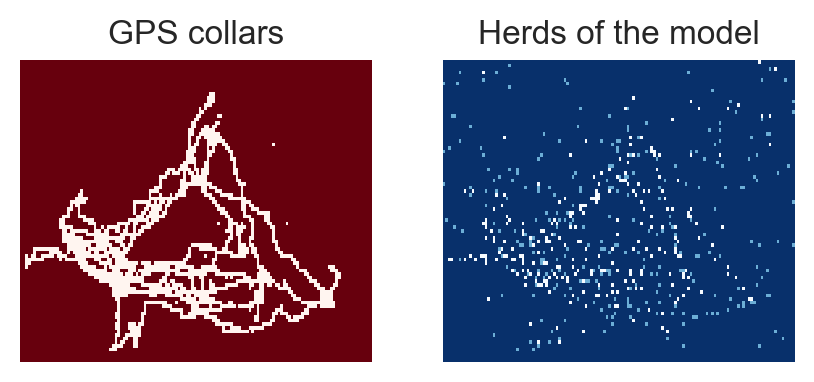

In [137]:
data_colliers=pd.read_csv('cell_colliers3.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace3.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((84,134),0) #remplacer 20 par 38 et 50 par 36
while k<len(v1):#len(v)=len(N)
    for i in range(0,84):
        for j in range(0,134):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,85)]) 
v15=np.array([i for i in range(1,135)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((84,134),0) 
while kr<len(v1r):
    for i in range(0,84):
        for j in range(0,134):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=3.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=6\ km$

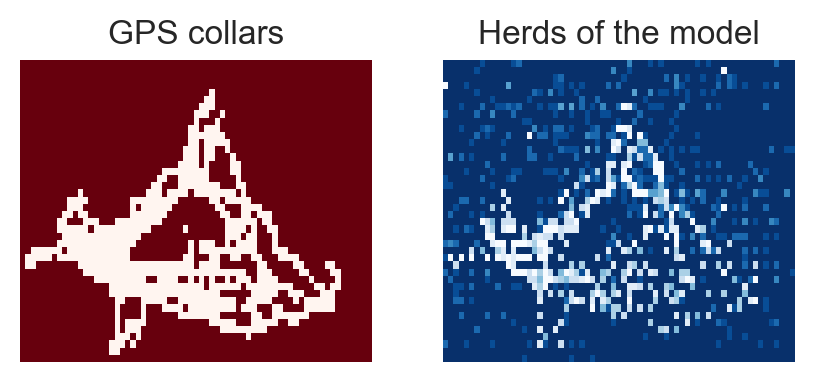

In [63]:
data_colliers=pd.read_csv('cell_colliers6.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace6.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((42,67),0) #remplacer 20 par 38 et 50 par 36
while k<len(v1):#len(v)=len(N)
    for i in range(0,42):
        for j in range(0,67):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,43)]) 
v15=np.array([i for i in range(1,68)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((42,67),0) 
while kr<len(v1r):
    for i in range(0,42):
        for j in range(0,67):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=4.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=9\ km$

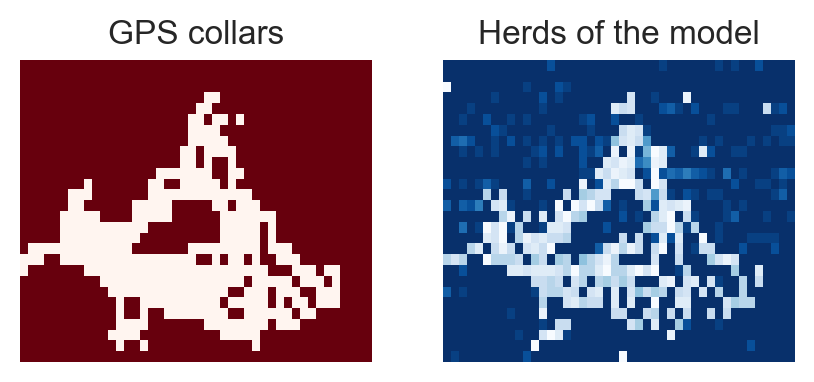

In [66]:
data_colliers=pd.read_csv('cell_colliers9.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace9.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((28,44),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,28):
        for j in range(0,44):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,29)]) 
v15=np.array([i for i in range(1,45)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((28,44),0) 
while kr<len(v1r):
    for i in range(0,28):
        for j in range(0,44):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=5.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=12\ km$

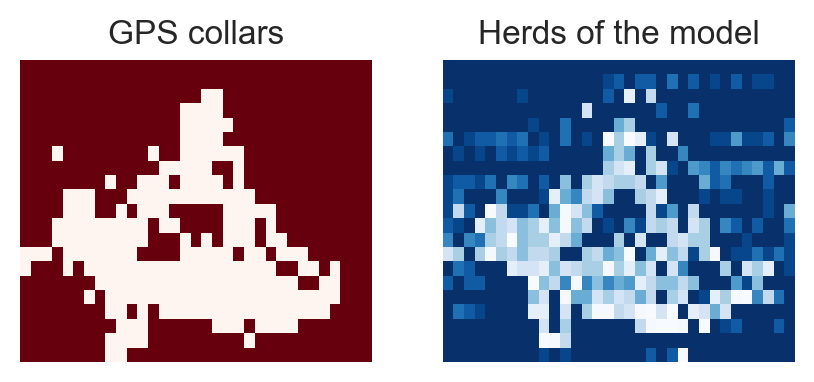

In [70]:
data_colliers=pd.read_csv('cell_colliers12.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace12.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((21,33),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,21):
        for j in range(0,33):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,22)]) 
v15=np.array([i for i in range(1,34)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((21,33),0) 
while kr<len(v1r):
    for i in range(0,21):
        for j in range(0,33):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=8.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=15\ km$

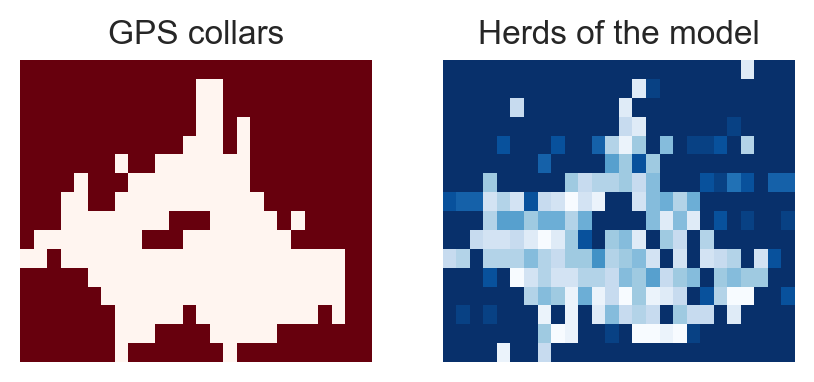

In [74]:
data_colliers=pd.read_csv('cell_colliers15.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace15.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((16,26),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,16):
        for j in range(0,26):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,17)]) 
v15=np.array([i for i in range(1,27)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((16,26),0) 
while kr<len(v1r):
    for i in range(0,16):
        for j in range(0,26):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=9.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=18\ km$

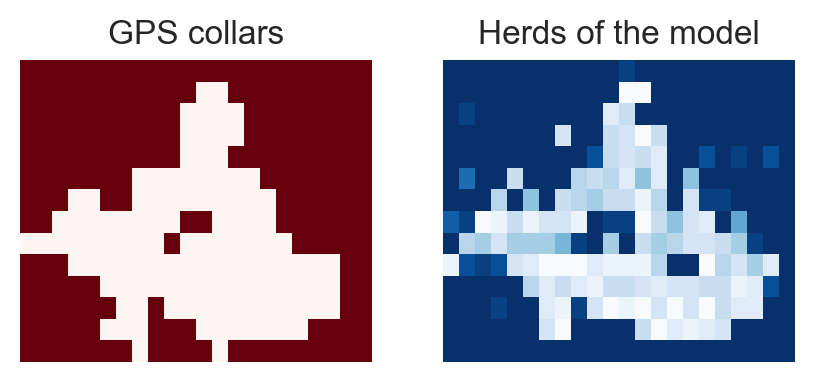

In [87]:
data_colliers=pd.read_csv('cell_colliers18.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace18.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((14,22),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,14):
        for j in range(0,22):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,15)]) 
v15=np.array([i for i in range(1,23)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((14,22),0) 
while kr<len(v1r):
    for i in range(0,14):
        for j in range(0,22):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=9.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=21\ km$

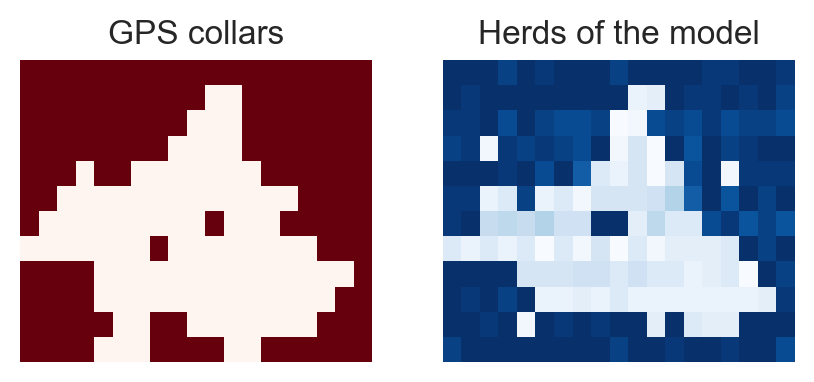

In [83]:
data_colliers=pd.read_csv('cell_colliers21.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace21.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((12,19),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,12):
        for j in range(0,19):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,13)]) 
v15=np.array([i for i in range(1,20)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((12,19),0) 
while kr<len(v1r):
    for i in range(0,12):
        for j in range(0,19):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=3.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=24\ km$

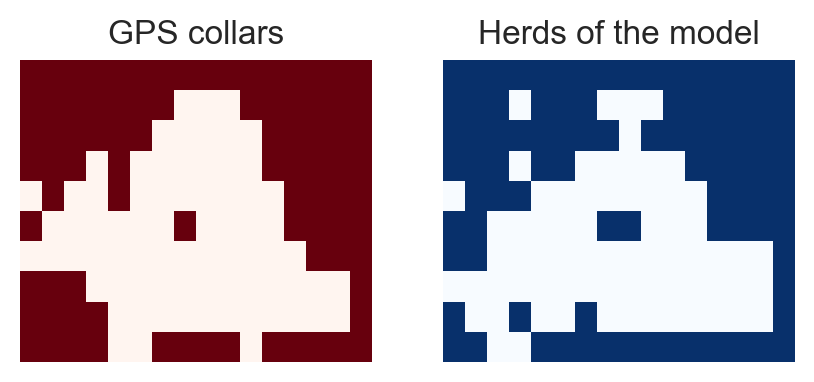

In [91]:
data_colliers=pd.read_csv('cell_colliers24.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace24.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((10,16),0) 
while k<len(v1):
    for i in range(0,10):
        for j in range(0,16):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,11)]) 
v15=np.array([i for i in range(1,17)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((10,16),0) 
while kr<len(v1r):
    for i in range(0,10):
        for j in range(0,16):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=27\ km$

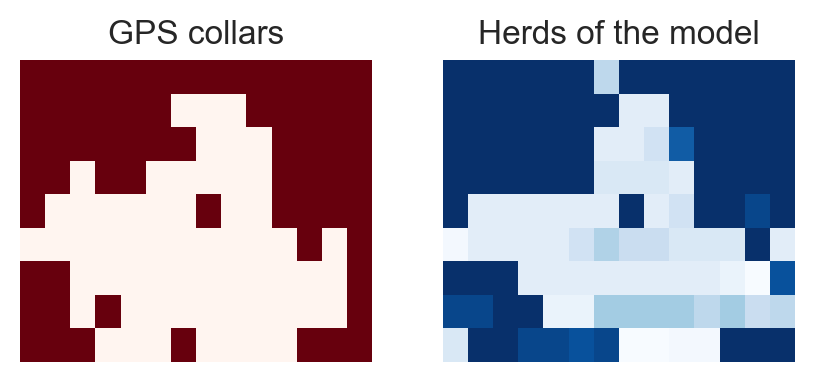

In [111]:
data_colliers=pd.read_csv('cell_colliers27.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace27.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((9,14),0) 
while k<len(v1):
    for i in range(0,9):
        for j in range(0,14):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,10)]) 
v15=np.array([i for i in range(1,15)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((9,14),0) 
while kr<len(v1r):
    for i in range(0,9):
        for j in range(0,14):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=8)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=30\ km$

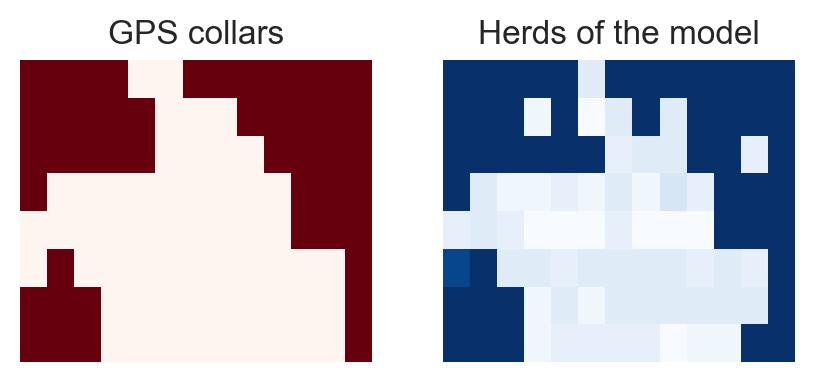

In [112]:
data_colliers=pd.read_csv('cell_colliers30.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace30.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((8,13),0) 
while k<len(v1):
    for i in range(0,8):
        for j in range(0,13):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,9)]) 
v15=np.array([i for i in range(1,14)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((8,13),0) 
while kr<len(v1r):
    for i in range(0,8):
        for j in range(0,13):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=8)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=33\ km$

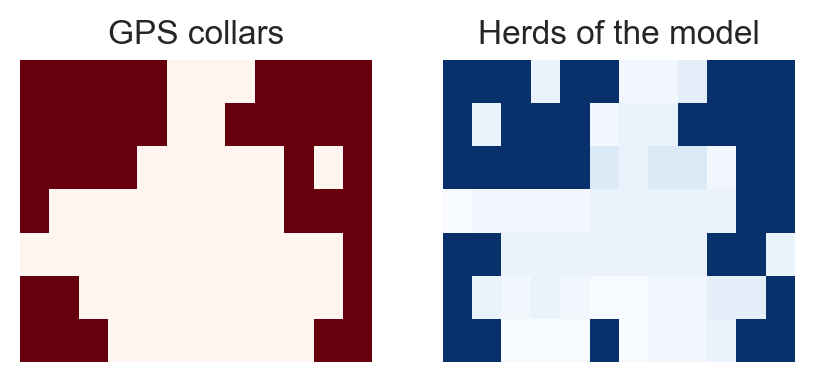

In [127]:
data_colliers=pd.read_csv('cell_colliers33.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace33.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((7,12),0) 
while k<len(v1):
    for i in range(0,7):
        for j in range(0,12):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,8)]) 
v15=np.array([i for i in range(1,13)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((7,12),0) 
while kr<len(v1r):
    for i in range(0,7):
        for j in range(0,12):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=6)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=36\ km$

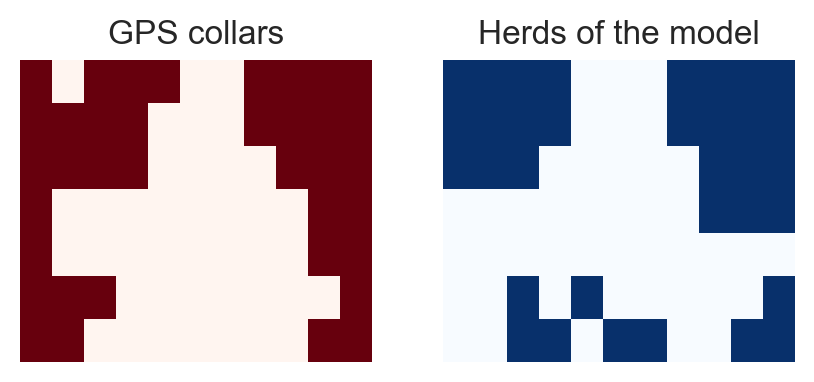

In [138]:
data_colliers=pd.read_csv('cell_colliers36.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace36.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((7,11),0) 
while k<len(v1):
    for i in range(0,7):
        for j in range(0,11):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,8)]) 
v15=np.array([i for i in range(1,12)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((7,11),0) 
while kr<len(v1r):
    for i in range(0,7):
        for j in range(0,11):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=3\ km$, $S_a=17\ km/day$, $S_r=19\ km/day$

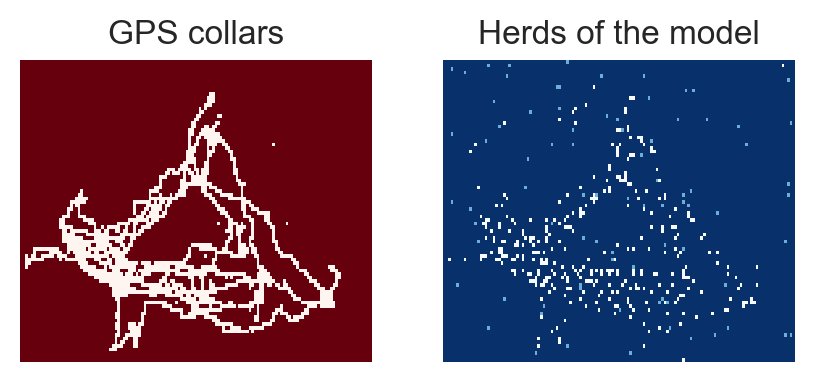

In [209]:
data_colliers=pd.read_csv('cell_colliers3.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_vitesse3.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((84,134),0) #remplacer 20 par 38 et 50 par 36
while k<len(v1):#len(v)=len(N)
    for i in range(0,84):
        for j in range(0,134):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,85)]) 
v15=np.array([i for i in range(1,135)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((84,134),0) 
while kr<len(v1r):
    for i in range(0,84):
        for j in range(0,134):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=3.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux $d_g=15\ km$, $S_a=17\ km/day$, $S_r=19\ km/day$

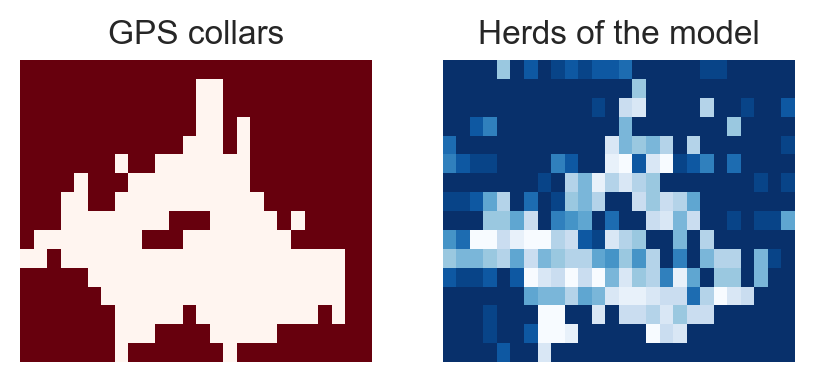

In [208]:
data_colliers=pd.read_csv('cell_colliers15.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_vitesse15.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((16,26),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,16):
        for j in range(0,26):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,17)]) 
v15=np.array([i for i in range(1,27)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((16,26),0) 
while kr<len(v1r):
    for i in range(0,16):
        for j in range(0,26):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=9.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux avec diminution homogène de la végetation $d_g=3\ km$, $S_a=15.5\ km/day$, $S_r=17.5\ km/day$, $\lambda_1=0.5$

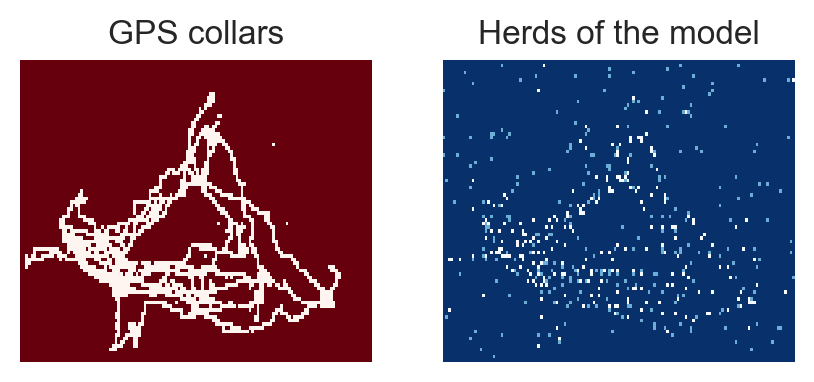

In [177]:
data_colliers=pd.read_csv('cell_colliers3.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_veg3.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((84,134),0) #remplacer 20 par 38 et 50 par 36
while k<len(v1):#len(v)=len(N)
    for i in range(0,84):
        for j in range(0,134):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,85)]) 
v15=np.array([i for i in range(1,135)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((84,134),0) 
while kr<len(v1r):
    for i in range(0,84):
        for j in range(0,134):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=3.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux avec diminution homogène de la végetation $d_g=15\ km$, $S_a=15.5\ km/day$, $S_r=17.5\ km/day$, $\lambda_1=0.5$

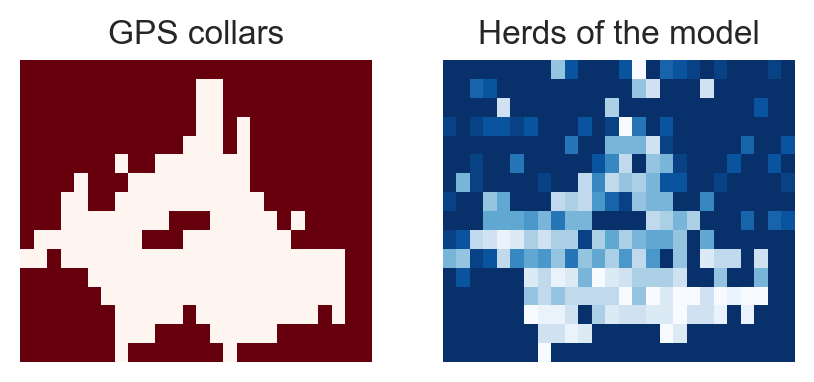

In [178]:
data_colliers=pd.read_csv('cell_colliers15.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_veg15.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((16,26),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,16):
        for j in range(0,26):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,17)]) 
v15=np.array([i for i in range(1,27)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((16,26),0) 
while kr<len(v1r):
    for i in range(0,16):
        for j in range(0,26):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=9.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux avec diminution du nombre de point d'eau $d_g=3\ km$, $S_a=15.5\ km/day$, $S_r=17.5\ km/day$, $\lambda_2=0.5$

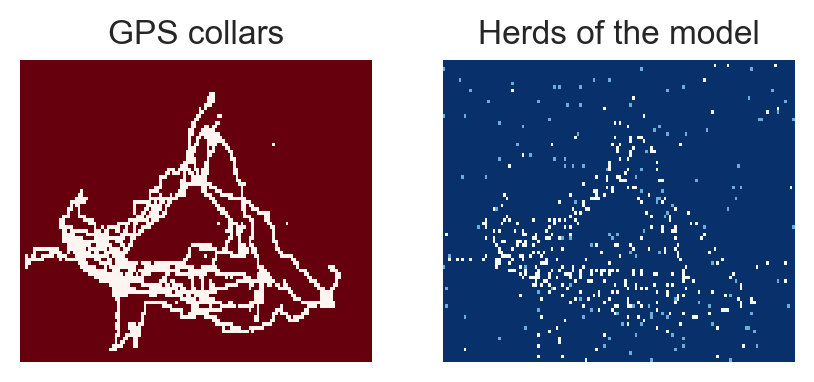

In [182]:
data_colliers=pd.read_csv('cell_colliers3.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_eau3.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((84,134),0) #remplacer 20 par 38 et 50 par 36
while k<len(v1):#len(v)=len(N)
    for i in range(0,84):
        for j in range(0,134):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,85)]) 
v15=np.array([i for i in range(1,135)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((84,134),0) 
while kr<len(v1r):
    for i in range(0,84):
        for j in range(0,134):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=3.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux avec diminution du nombre de point d'eau $d_g=15\ km$, $S_a=15.5\ km/day$, $S_r=17.5\ km/day$, $\lambda_2=0.5$

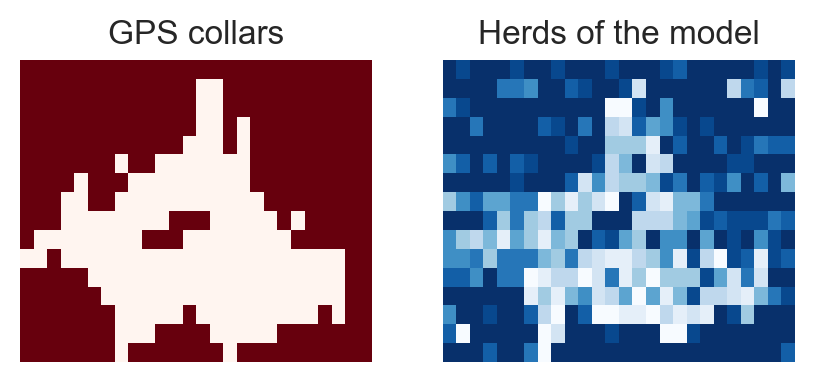

In [183]:
data_colliers=pd.read_csv('cell_colliers15.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_eau15.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((16,26),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,16):
        for j in range(0,26):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,17)]) 
v15=np.array([i for i in range(1,27)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((16,26),0) 
while kr<len(v1r):
    for i in range(0,16):
        for j in range(0,26):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=9.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux avec diminution homogène de la végetation et du nombre de point d'eau $d_g=3\ km$, $S_a=15.5\ km/day$, $S_r=17.5\ km/day$, $\lambda_1=0.5$ et $\lambda_2=0.5$

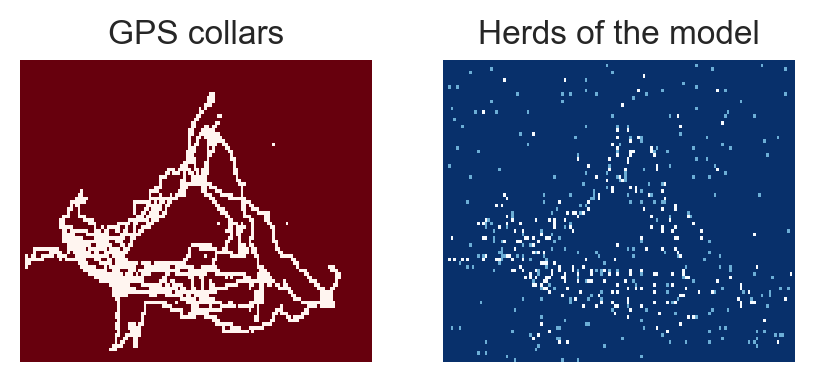

In [184]:
data_colliers=pd.read_csv('cell_colliers3.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_veg_eau3.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((84,134),0) #remplacer 20 par 38 et 50 par 36
while k<len(v1):#len(v)=len(N)
    for i in range(0,84):
        for j in range(0,134):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,85)]) 
v15=np.array([i for i in range(1,135)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((84,134),0) 
while kr<len(v1r):
    for i in range(0,84):
        for j in range(0,134):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=3.0)

#plt.savefig('repartition....')
plt.show()


# utilisation de l'espace par les troupeaux avec diminution homogène de la végetation et du nombre de point d'eau $d_g=15\ km$, $S_a=15.5\ km/day$, $S_r=17.5\ km/day$, $\lambda_1=0.5$ et $\lambda_2=0.5$

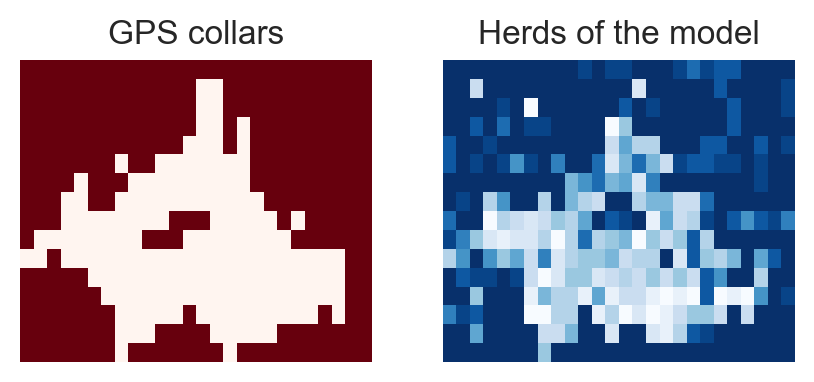

In [186]:
data_colliers=pd.read_csv('cell_colliers15.0.csv')
v1=data_colliers['grid_x']
v2=data_colliers['grid_y']
h=data_colliers['s_nb_collier']

data_trp=pd.read_csv('espace_veg_eau15.0.csv')
v1r=data_trp['grid_x']
v2r=data_trp['grid_y']
hr=data_trp['s_nb_trp']

plt.figure(figsize=(5,2),dpi=200)
##-------------------------------------------------Distribution spatiale des trace des colliers GPS -----------
k=0
m=np.full((16,26),0) 
while k<len(v1):#len(v)=len(N)
    for i in range(0,16):
        for j in range(0,26):
            m[i][j]=m[i][j]+h[k]
            k=k+1

v14=np.array([i for i in range(1,17)]) 
v15=np.array([i for i in range(1,27)])
data2_coliiers=pd.DataFrame(m,v14,v15)

plt.subplot(1,2,1)
plt.title("GPS collars")
sns.heatmap(data2_coliiers,cmap='Reds_r',xticklabels=False,yticklabels=False,robust=True,cbar=False)#vmin=200.0,vmax=2000,

##-------------------------------------------------Distribution spatiale des trace des troupeaux du modèle -----------
kr=0
mr=np.full((16,26),0) 
while kr<len(v1r):
    for i in range(0,16):
        for j in range(0,26):
            mr[i][j]=mr[i][j]+hr[kr]
            kr=kr+1

data2_trp=pd.DataFrame(mr,v14,v15)
plt.subplot(1,2,2)
plt.title('Herds of the model')
sns.heatmap(data2_trp,cmap='Blues_r',xticklabels=False,yticklabels=False,robust=True,cbar=False,vmin=9.0)

#plt.savefig('repartition....')
plt.show()
